<a href="https://colab.research.google.com/github/JatinKhare/RNN-py/blob/master/Time_Dedependent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.layers import*
from keras.models import*
import pandas as pd
import matplotlib.pyplot as plt

[ 0.          0.00500048  0.01000083 ... -0.2720122  -0.26719687
 -0.26237485]


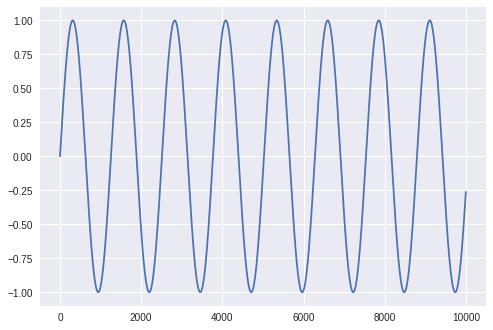

In [166]:
n = np.linspace(0,50,10000)
sine = np.sin(n)
print(sine)
plt.plot(sine)

In [167]:
interval = 10
x =[]
y =[]
for i in range(0,sine.shape[0]-interval):
  input = sine[i:i+interval]
  y.append(sine[i])
  x.append([input])
  
  
x = np.reshape(x, (len(x), interval, 1))
y = np.reshape(y, (len(y), 1))

print(x.shape, y.shape)

(9990, 10, 1) (9990, 1)


In [168]:
model = Sequential()



model.add(LSTM(16, input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))


model.add(Dense(1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 16)                1152      
_________________________________________________________________
dropout_63 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [169]:
#x = np.reshape(x,(x.shape[0],1,x.shape[1]))
out = model.fit(x, y, epochs=20, batch_size=10, validation_split=0.3)


(9990, 10, 1) (9990, 1)
Train on 6993 samples, validate on 2997 samples
Epoch 1/20
6993/6993 [==============================] - 9s 1ms/step - loss: 0.0164 - val_loss: 6.8731e-04
Epoch 2/20
6993/6993 [==============================] - 6s 836us/step - loss: 0.0088 - val_loss: 0.0011
Epoch 3/20
6993/6993 [==============================] - 6s 794us/step - loss: 0.0084 - val_loss: 6.0517e-04
Epoch 4/20
6993/6993 [==============================] - 5s 778us/step - loss: 0.0085 - val_loss: 8.2170e-04
Epoch 5/20
6993/6993 [==============================] - 5s 772us/step - loss: 0.0083 - val_loss: 5.5215e-04
Epoch 6/20
6993/6993 [==============================] - 5s 769us/step - loss: 0.0088 - val_loss: 0.0028
Epoch 7/20
6993/6993 [==============================] - 5s 763us/step - loss: 0.0088 - val_loss: 0.0010
Epoch 8/20
6993/6993 [==============================] - 5s 771us/step - loss: 0.0082 - val_loss: 8.8719e-04
Epoch 9/20
6993/6993 [==============================] - 5s 784us/step - loss: 

In [170]:
Test = model.evaluate(x, y)
Test

9990/9990 [==============================] - 1s 57us/step


0.0011938026221683172

[ 0.74511316  0.74109774  0.73705564 ... -0.51667779 -0.51153092
 -0.50636564]
(9990, 10, 1) (9990, 1)


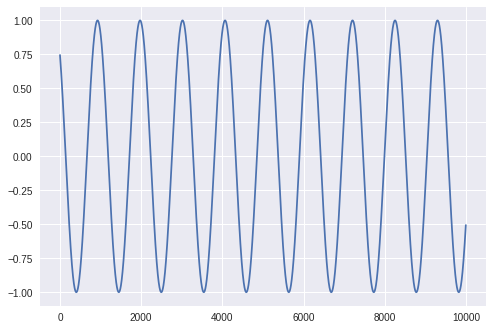

In [172]:
n = np.linspace(40,100,10000)
sine = np.sin(n)
print(sine)
plt.plot(sine)


interval = 10
x =[]
y =[]
for i in range(0,sine.shape[0]-interval):
  input = sine[i:i+interval]
  y.append(sine[i])
  x.append([input])
  
  
x = np.reshape(x, (len(x), interval, 1))
y = np.reshape(y, (len(y), 1))

print(x.shape, y.shape)


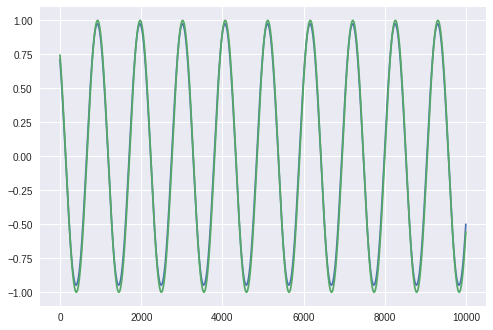

In [178]:
q = model.predict(x)
plt.plot(q)
plt.plot(y)